# Линейная регрессия. Градиентный спуск

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

Пусть имеется обучающая выборка $\mathbb X=\{(x^1,y^1), \dots (x^j,y^j)\dots (x^N,y^N)\} $, $x^j=\{x_1,x_2,\dots x_d\}$ - вектор признаков $j$-ого объекта (всего $d$ признаков), $y^j$ - значение целевого признака (ответа), в задаче регрессии $y^j \in R$. Удобно представить обучающую выборку в виде  матрицы "объекты-признаки":
$$
X=\left(\matrix{x_1^1,x_2^1,\dots x_d^1 \\ x_1^2,x_2^2,\dots x_d^2\\ \dots \dots \\ x_1^N,x_2^N,\dots x_d^N}\right),
$$ в которой каждая строка содержит признаковое описание
одного из обучающих объектов ( $N$-число объектов). Таким образом, строки в этой матрице соответствуют
объектам, а столбцы - признакам.
Нашей задачей является построение функции a : $X \to Y$, которая для любого
объекта будет предсказывать ответ. Такая функция называется алгоритмом или моделью (hypothesis).
Линейная регрессионная модель сводится к сумме признаков объектов с некоторыми весами (параметры модели): 
$$
a(x)=w_0+w_1x_1+w_2x_2+\dots +w_dx_d=(\vec w,\vec x)
$$
Здесь $\vec w =\{w_0,w_1,w_2 \dots w_d \}$ - вектор весов, $\vec x =\{1,x_1,x_2 \dots x_d \}$ - вектор признаков с единичным признаком. 

Функционал качества в задачах обучения с учителем обычно задается в виде суммы по объектам выборки:
$$Q(a) = \frac 1 N \sum_{i=1}^N L(y_i, a(x_i)),$$
где $L(y, a)$ - функция потерь, задающая штраф за разницу между предсказанием и истинным значением целевого признака. 
Рассмотрим квадратичную функцию потерь 
$$
L(y,a)=(y-a)^2.
$$
Тогда задача обучения сводится к задаче оптимизации:
$$
Q(a,X)=\frac{1}{N}\sum_{j=1}^N \left(y^{(j)} -(\vec w,\vec x^j) \right)^2 \to \min,
$$
или в матричном виде 
$$
Q(a,X)=\frac{1}{N}\parallel Xw - y\parallel^2  \to \min,
$$
Эта задача может быть решена явно: 
$$w = (X^TX)^{-1}X^Ty.$$

Научимся запускать линейную регрессию из scikit-learn.

In [2]:
from sklearn.linear_model import LinearRegression

In [64]:
np.random.seed(17)
n_features = 2
n_objects = 300
w_true = np.array([1.0,1.0])
X = np.random.uniform(-5,5, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0,1, (n_objects))

Обучим линейную регрессию, выведем коэффициенты: 
$$
a(x)=w_0+w_1x_1+w_2x_2
$$

In [16]:
lr = LinearRegression()
lr.fit(X,Y)
print('Model: w_0=',lr.intercept_,'w_1=',lr.coef_[0],'w_2=',lr.coef_[1])

Model: w_0= 0.03495244495190963 w_1= 1.0103816892089745 w_2= 1.0262556356704529


Выведем $R^2$ - коэффициент детерминации, определяемый:
$$R^2 = 1 - \frac{\sum_i (y_i - a(x_i))^2}{\sum_i (y_i - \overline{y}_i)^2}$$

In [17]:
print(lr.score(X,Y))

0.932497833857799


Выведем предсказание модели:

In [20]:
lr.predict([[1, 2]])

array([3.09784541])

#### Ошибки

In [22]:
y_pred=lr.predict(X)

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as  mse


print(mae(y_pred,Y),mse(y_pred,Y))

0.8571392470074388 1.1606107010059759


## Градиентный спуск


Обращение матрицы $X^TX$  — очень трудоёмкая операция при большом количестве признаков. Параметры модели ищут итерационными методами, один из них — градиентный спуск.

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала: 

$$w^{(k+1)} = w^{(k)} - \eta_k \nabla Q(w^{(k)}),$$
где $\eta_k$ — шаг градиентного спуска.

Формула градиента квадратичной функции ошибки выглядит следующим образом:

$$\nabla Q(w)  = \frac{2}{N}(X^TXw - X^Ty).$$
 

Напишем функцию градиентного спуска, зависящую от:
- X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w_0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - num_steps — число шагов; 
 и возращающую конечный вектор весов и значения функционала ошибки на каждом шаге.

In [68]:
def grad_descent(X, y, w_0,step_size, num_steps):
    w = w_0.copy()
    w_list=[]
    for i in range(num_steps):
        w_list.append(w)
        w =w- 2 * step_size * np.dot(X.T, np.dot(X, w) - y)/X.shape[0]
    return w_list

In [69]:
num_steps = 20
step_size = 1e-2
w_0 = np.array([0,0])
w_list=grad_descent(X, Y, w_0,step_size, num_steps)
w_list = np.array(w_list) #иначе имеем массив из массивов
print(w_list)

[[0.         0.        ]
 [0.14919424 0.16562692]
 [0.27647494 0.30441282]
 [0.38503988 0.42072627]
 [0.47762395 0.51822174]
 [0.55656549 0.59995687]
 [0.6238632  0.66849035]
 [0.68122503 0.72596363]
 [0.73011011 0.77416935]
 [0.77176467 0.81460829]
 [0.8072529  0.84853718]
 [0.83748328 0.87700851]
 [0.86323124 0.90090388]
 [0.88515845 0.92096188]
 [0.90382947 0.93780134]
 [0.91972585 0.95194091]
 [0.93325829 0.96381527]
 [0.94477697 0.97378883]
 [0.95458045 0.98216713]
 [0.96292322 0.98920638]]


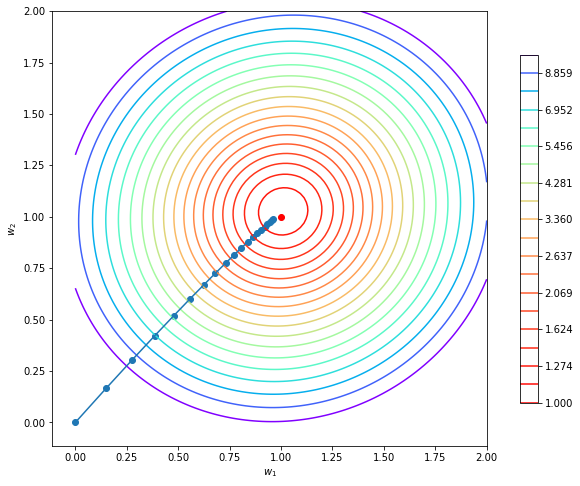

In [70]:
# compute level set
A, B = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(12, 8))
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

## Стандартизация признаков

In [29]:
X = np.random.normal(2,5, (n_objects, n_features))
print(X)

[[  0.20151128   2.11559374]
 [  0.60217164  -5.3182231 ]
 [-10.74938185   9.32908611]
 [  7.23954787   3.49879448]
 [  4.03216726 -12.91938055]
 [ -3.82534583   4.30205507]
 [ -2.6375244   -0.13871917]
 [  9.71048239   4.11194182]
 [  0.76675673   2.8816548 ]
 [ -0.82382105  -0.55406697]
 [ -0.88974435  -3.10023132]
 [ -0.58709405   6.86157811]
 [  0.97914541   6.43679192]
 [ 11.24487135   5.98653426]
 [-10.50442404  -1.20108631]
 [  4.63413149   8.20398233]
 [ -4.12967275  15.01321639]
 [ -2.60448556   7.47030086]
 [  1.75779061   2.80349073]
 [ -0.17563904  -2.29008605]
 [ -1.78503644   4.7719328 ]
 [ -2.04080441   2.83902535]
 [ -1.80695147   8.04001188]
 [ -0.23946     12.79256873]
 [  4.06679349  -8.66222184]
 [  1.55114862   2.50579227]
 [  4.29536763   1.42322007]
 [  8.59416769   2.95363102]
 [  6.12190589   0.67051544]
 [ -0.19242022   0.33511081]
 [ -0.43748937   0.42826506]
 [  2.95565074  -2.10972054]
 [  6.23122415  10.10913914]
 [  9.30132072   1.37554045]
 [ -7.23501927

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [52]:
print(len(X_train),len(X_test),'\n')

210 90 



In [53]:
print(np.mean(X_train,axis=0))

[1.99885649 2.35473326]


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [55]:
print(np.mean(X_train,axis=0))
print(np.std(X_train,axis=0))

[ 7.82442894e-17 -2.33675513e-16]
[1. 1.]


In [56]:
X_test = scaler.transform(X_test)

In [57]:
print(np.mean(X_test,axis=0))

[ 0.04252829 -0.1246739 ]


## Стохастический градиентный спуск

#### 1. Напишите функцию стохастического градиентного спуска. 
Функция использует для оценки градиента всего функционала ошибки значение градиента, вычисленного по подвыборке размера batch_size=10. Визуализируйте траекторию, длина шага $\eta=1$.

## Линейная регрессия на данных

In [58]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [59]:
X = data.data
y = data.target
N, d = X.shape
print( N, d)

506 13


Разбейте выборку на обучающую и тестовую в соотношении 7:3. Проведите стандартизацию признаков, постройте линейную регреcсию и ответьте на следующие вопросы. 
#### 1. Какова ошибка (коэффициент $R^2$) линейной регрессии на обучающей  выборке?

#### 2. Какова ошибка (коэффициент $R^2$) линейной регрессии на тестовой выборке?

#### 3. Постройте диаграмму важности признаков. 
Используйте plt.bar, отсортируйте признаки по важности (модуль соответствующего коэффициента в линейной регрессии) и постройте диаграмму.  Какой признак наиболее важный?

In [71]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3